## Importing libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

## Model Functions

In [22]:
# Step 1: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 2: Prediction Function
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

# Step 3: Loss Function (Binary Cross-Entropy)
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Step 4: Gradient Descent
def gradient_descent(X, y, weights, learning_rate):
    N = len(y)
    y_pred = predict(X, weights)
    gradient = np.dot(X.T, (y_pred - y)) / N
    weights -= learning_rate * gradient
    return weights


# Step 5: Training Function
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    # Initialize weights
    weights = np.zeros(X.shape[1])
    los = []
    # Gradient Descent
    for epoch in range(epochs):
        y_pred = predict(X, weights)
        losss = compute_loss(y, y_pred)
        weights = gradient_descent(X, y, weights, learning_rate)

        # Print the loss every 100 epochs for tracking
        if epoch % 100 == 0:
            los.append(losss)
            print(f'aEpoch {epoch}: Loss = {losss}')

    return weights,los

# Function to calculate error rate
def error_rate(y_true, y_pred):
    incorrect = np.sum(y_true != y_pred)  # Count incorrect predictions
    print(incorrect)
    total = len(y_true)
    print(total)                   # Total predictions
    return incorrect / total               # Calculate error rate



## Loading Iris DataSet 

In [23]:
# Load the Iris dataset as a DataFrame and prepare the features and target
iris = datasets.load_iris()
dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['species'])

# Assign the features and target to X and labels to y
X = dataset[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y = dataset['species'].values

dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## One Vs Rest Strategy

In [24]:
# One-vs-Rest Strategy for multiclass classification
num_classes = len(np.unique(y))
weights_list = []
losses = []
from sklearn.model_selection import train_test_split
# Predicting using the trained models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model for each class
for i in range(num_classes):
    # Create binary target variable: 1 if current class, 0 otherwise
    y_binary = np.where(y_train == i, 1, 0)
    weights, los = train_logistic_regression(X_train, y_binary, learning_rate=0.15, epochs=1500)
    weights_list.append(weights)
    losses.append(los)



aEpoch 0: Loss = 0.6931471805599453
aEpoch 100: Loss = 0.04041118955039848
aEpoch 200: Loss = 0.021753149235384836
aEpoch 300: Loss = 0.015130168589118054
aEpoch 400: Loss = 0.011695705914135856
aEpoch 500: Loss = 0.00958000115498083
aEpoch 600: Loss = 0.008139839869880176
aEpoch 700: Loss = 0.007093194829101494
aEpoch 800: Loss = 0.006296471615844072
aEpoch 900: Loss = 0.005668677487328475
aEpoch 1000: Loss = 0.005160577616993634
aEpoch 1100: Loss = 0.004740477831031148
aEpoch 1200: Loss = 0.004387029620065967
aEpoch 1300: Loss = 0.0040853143863237825
aEpoch 1400: Loss = 0.003824584360851314
aEpoch 0: Loss = 0.6931471805599453
aEpoch 100: Loss = 0.5712201341988086
aEpoch 200: Loss = 0.5498209813709752
aEpoch 300: Loss = 0.5399812854715633
aEpoch 400: Loss = 0.5340005000467993
aEpoch 500: Loss = 0.530237879247951
aEpoch 600: Loss = 0.5278031415027232
aEpoch 700: Loss = 0.5261869844680273
aEpoch 800: Loss = 0.5250885996430379
aEpoch 900: Loss = 0.5243252036899533
aEpoch 1000: Loss = 0.5

## Function to predict class for new samples

In [25]:
# Function to predict class for new samples
def predict_multiclass(X, weights_list):
    probabilities = np.array([predict(X, weights) for weights in weights_list]).T
    return np.argmax(probabilities, axis=1)

## Predict the class for the test set

In [102]:
# predict the class for the test set
y_pred = predict_multiclass(X_test, weights_list)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Visualize the results

In [65]:
test_df = pd.DataFrame(data=X_test, columns=iris['feature_names'])

# Add the predicted class to the DataFrame
test_df['predicted_class'] = y_pred
test_df['predicted_class'] = test_df['predicted_class'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Add the actual class to the DataFrame
test_df['actual_class'] = y_test
test_df['actual_class'] = test_df['actual_class'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

test_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted_class,actual_class
0,6.1,2.8,4.7,1.2,versicolor,versicolor
1,5.7,3.8,1.7,0.3,setosa,setosa
2,7.7,2.6,6.9,2.3,virginica,virginica
3,6.0,2.9,4.5,1.5,versicolor,versicolor
4,6.8,2.8,4.8,1.4,versicolor,versicolor
5,5.4,3.4,1.5,0.4,setosa,setosa
6,5.6,2.9,3.6,1.3,versicolor,versicolor
7,6.9,3.1,5.1,2.3,virginica,virginica
8,6.2,2.2,4.5,1.5,versicolor,versicolor
9,5.8,2.7,3.9,1.2,versicolor,versicolor


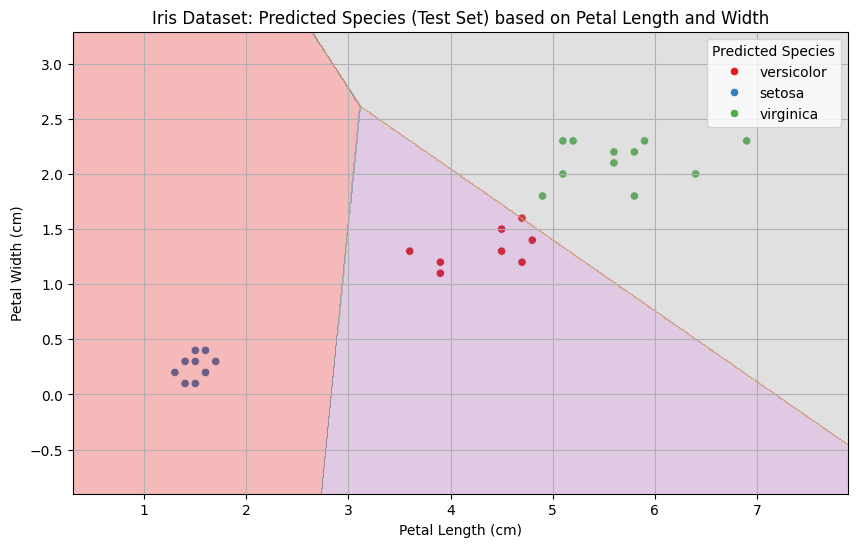

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='predicted_class', palette='Set1')
plt.title('Iris Dataset: Predicted Species (Test Set) based on Petal Length and Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Predicted Species')
plt.grid()

# Add a decision boundary with a contour plot
x_min, x_max = X_test[:, 2].min() - 1, X_test[:, 2].max() + 1
y_min, y_max = X_test[:, 3].min() - 1, X_test[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Create a grid with all 4 features, keeping sepal length and sepal width constant
sepal_length = np.mean(X_test[:, 0])
sepal_width = np.mean(X_test[:, 1])
grid = np.c_[np.full(xx.ravel().shape, sepal_length), 
             np.full(xx.ravel().shape, sepal_width), 
             xx.ravel(), 
             yy.ravel()]

# Predict for each point in the mesh grid
Z = predict_multiclass(grid, weights_list)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
plt.show()

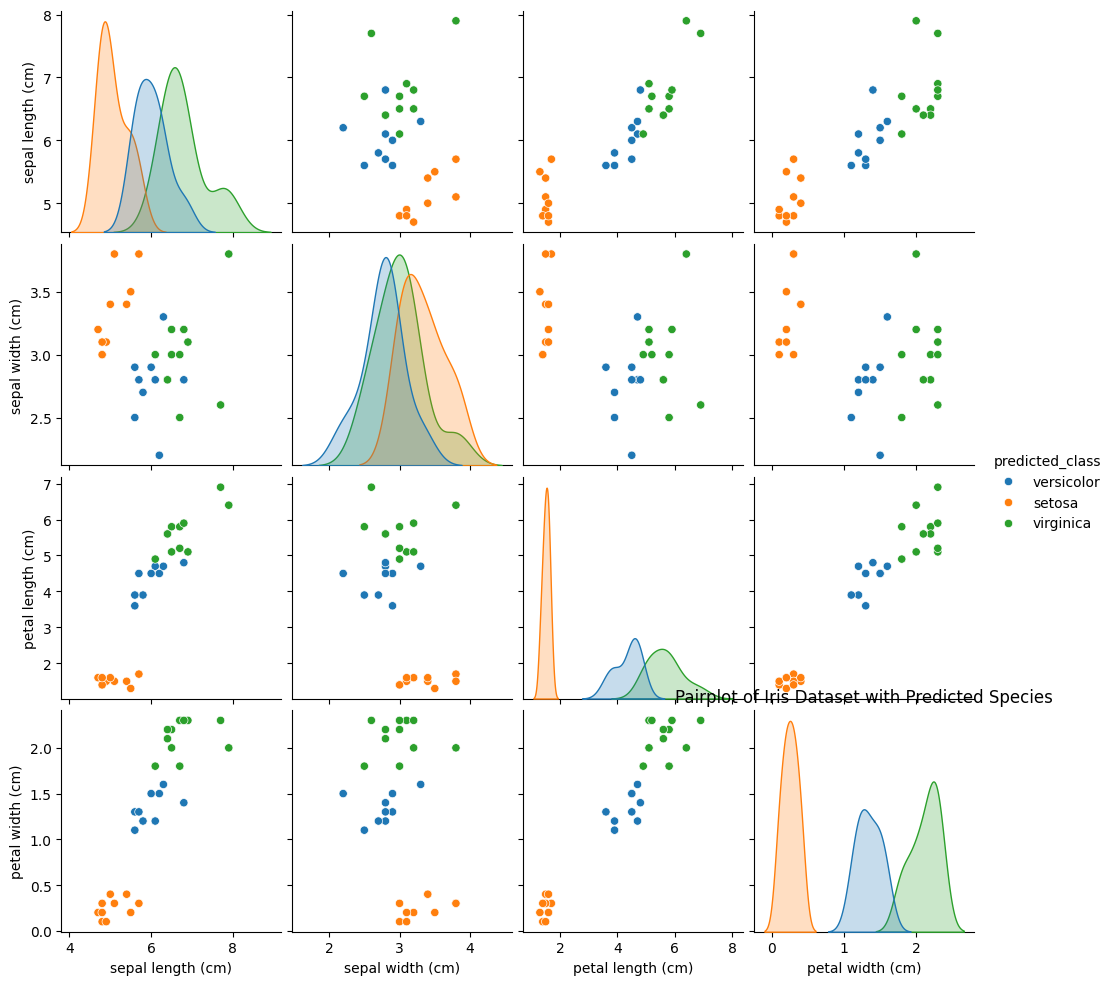

In [59]:
# Create a pair plot for the dataset with predictions
sns.pairplot(test_df, hue='predicted_class')
plt.title('Pairplot of Iris Dataset with Predicted Species')
plt.show()

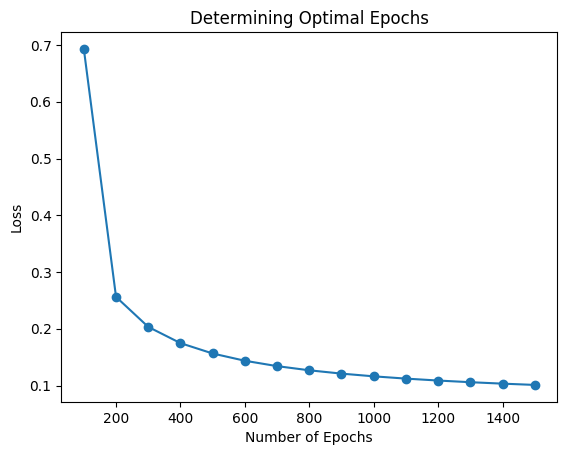

In [ ]:
epochs_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]

plt.plot(epochs_list, los, marker='o')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Determining Optimal Epochs')
plt.show()

In [63]:
# Calculate and print the error rate
error = error_rate(y_test, y_pred)
print(f'Error Rate: {error * 100:.2f}%')

0
30
Error Rate: 0.00%


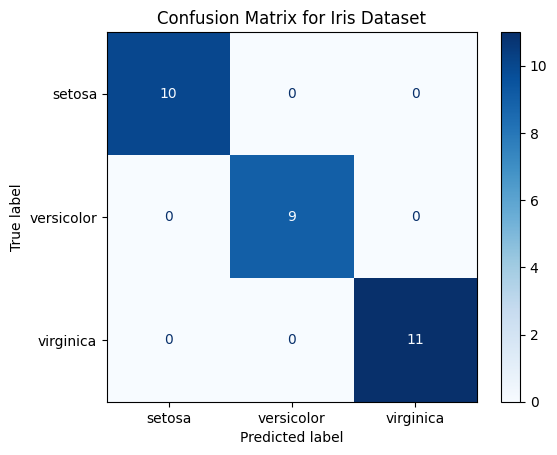

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Iris Dataset')
plt.show()